#### INTEGRANTES 
Pedro Sierra  
Tomás Lopera  
Pablo García   
Juan José Londoño  

In [ ]:
import kagglehub
import pandas as pd
import os
import shutil

# Descargar última versión del dataset
path = kagglehub.dataset_download("khushikyad001/finance-and-economics-dataset-2000-present")
print("Path to dataset files:", path)

# Carpeta de destino = carpeta actual donde corres el script
dest_folder = os.getcwd()

# Listar archivos descargados
files = os.listdir(path)
print("Archivos descargados:", files)

# Copiar cada archivo a la carpeta actual
for f in files:
    src = os.path.join(path, f)
    dst = os.path.join(dest_folder, f)
    shutil.copy(src, dst)
    print(f"Archivo guardado en: {dst}")

# Cargar el primer CSV (ajusta si el dataset trae más de uno)
df = pd.read_csv(os.path.join(dest_folder, files[0]))
print(df.head())


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   3000 non-null   object 
 1   Stock Index                            3000 non-null   object 
 2   Open Price                             3000 non-null   float64
 3   Close Price                            3000 non-null   float64
 4   Daily High                             3000 non-null   float64
 5   Daily Low                              3000 non-null   float64
 6   Trading Volume                         3000 non-null   int64  
 7   GDP Growth (%)                         3000 non-null   float64
 8   Inflation Rate (%)                     3000 non-null   float64
 9   Unemployment Rate (%)                  3000 non-null   float64
 10  Interest Rate (%)                      3000 non-null   float64
 11  Cons

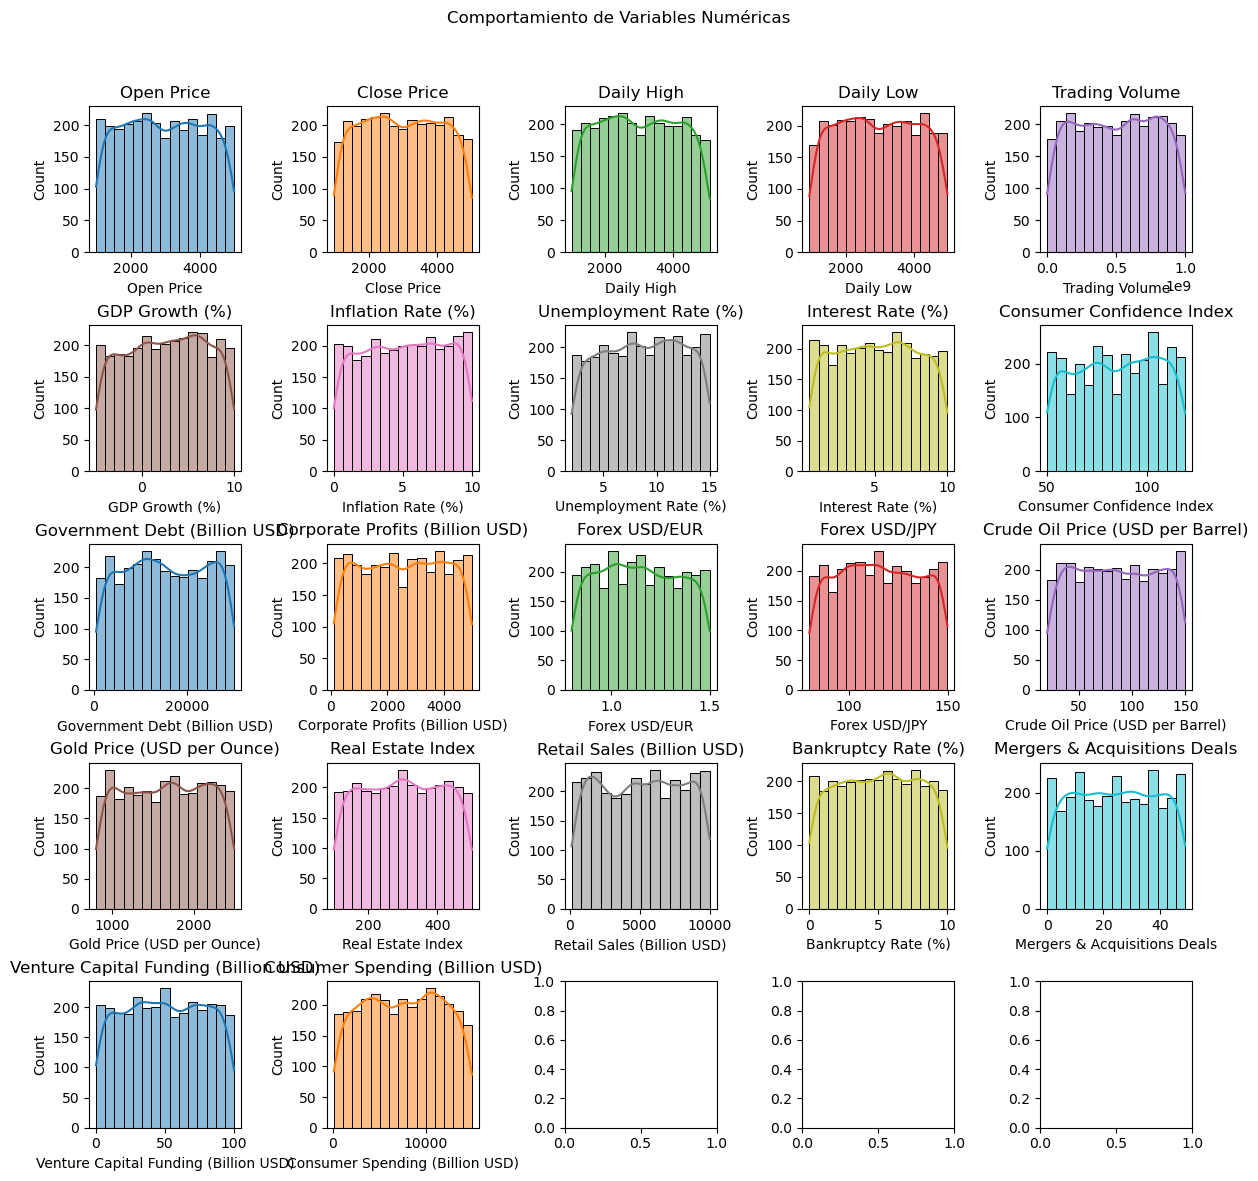

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb
fig, ax = plt.subplots(5, 5, figsize = (12, 12))
ax = ax.flat
num_col = df.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = df, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()


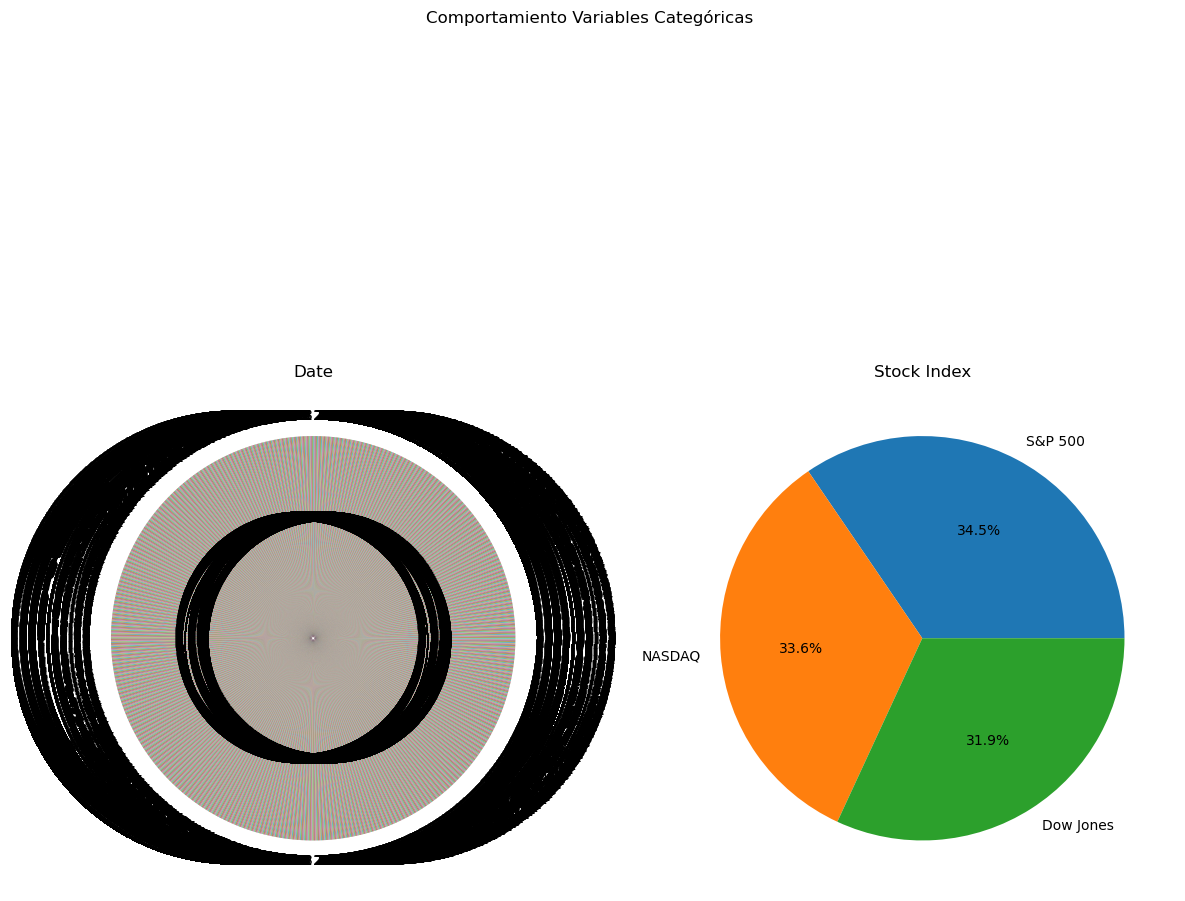

In [8]:
##GRÁFICOS DE TORTA
fig, ax = plt.subplots(1
                       , 2, figsize = (12, 12))
ax = ax.flat
cat_col = df.select_dtypes(include = ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x = df[col].value_counts(), labels = df[col].value_counts().index, autopct = '%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()

#### What
 Este dataset tiene información financiera de precios diarios de índices bursatiles(apertura, cierre, máximo, mínimo, volumen).  
 Variables macroeconómicas como Pib, inflación, desempleo  
 Indicadores financieros globales como tipo de cambio, oro, bienes raíces  
 Dinámicas corporativas: quiebras, fusiones/adquisiciones, capital de   riesgo, gasto del consumidor.  

 Las variables especificas:  
| #  | Nombre                               | Tipo de Dato              |
|----|--------------------------------------|--------------------------|
| 0  | Date                                 | Ordinal Cíclica          |
| 1  | Stock Index                           | Cualitativa              |
| 2  | Open Price                            | Cuantitativa Secuencial  |
| 3  | Close Price                           | Cuantitativa Secuencial  |
| 4  | Daily High                            | Cuantitativa Secuencial  |
| 5  | Daily Low                             | Cuantitativa Secuencial  |
| 6  | Trading Volume                        | Cuantitativa Secuencial  |
| 7  | GDP Growth (%)                        | Cuantitativa Divergente  |
| 8  | Inflation Rate (%)                    | Cuantitativa Secuencial  |
| 9  | Unemployment Rate (%)                 | Cuantitativa Secuencial  |
| 10 | Interest Rate (%)                     | Cuantitativa Secuencial  |
| 11 | Consumer Confidence Index             | Cuantitativa Secuencial  |
| 12 | Government Debt (Billion USD)        | Cuantitativa Secuencial  |
| 13 | Corporate Profits (Billion USD)      | Cuantitativa Secuencial  |
| 14 | Forex USD/EUR                         | Cuantitativa Secuencial  |
| 15 | Forex USD/JPY                         | Cuantitativa Secuencial  |
| 16 | Crude Oil Price (USD per Barrel)      | Cuantitativa Secuencial  |
| 17 | Gold Price (USD per Ounce)            | Cuantitativa Secuencial  |
| 18 | Real Estate Index                     | Cuantitativa Secuencial  |
| 19 | Retail Sales (Billion USD)            | Cuantitativa Secuencial  |
| 20 | Bankruptcy Rate (%)                   | Cuantitativa Secuencial  |
| 21 | Mergers & Acquisitions Deals          | Cuantitativa Secuencial  |
| 22 | Venture Capital Funding (Billion USD) | Cuantitativa Secuencial  |
| 23 | Consumer Spending (Billion USD)       | Cuantitativa Secuencial  |

### Why 

1. Permitir la identificación de días con movimientos atípicos en precios o volúmenes de transacción.
{Identify, Outliers}

2. Evaluar cómo el crecimiento del PIB y la inflación influyen en el rendimiento de los índices.
{Compare, Trends}

3. Relacionar tasas de interés y desempleo con la evolución del mercado en periodos de crisis o recuperación.
{Compare, Features}

4. Mostrar tendencias de consumo (Retail Sales, Consumer Spending) en distintos periodos de tiempo.
{Summarize, Trends}

5. Generar alertas cuando el índice de bancarrota supere un umbral crítico.
{Identify, Thresholds}

6. Comparar comportamiento del mercado antes y después de fusiones y adquisiciones relevantes.
{Compare, Events}

